In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
col_labels = [n for n in range(64)]
test_3 = pd.read_csv("test3.txt", sep=" ", usecols=range(64), names=col_labels)
test_5 = pd.read_csv("test5.txt", sep=" ", usecols=range(64), names=col_labels)
train_3 = pd.read_csv("train3.txt", sep=" ", usecols=range(64), names=col_labels)
train_5 = pd.read_csv("train5.txt", sep=" ", usecols=range(64), names=col_labels)
# Label it
test_3["label"] = -1
test_5["label"] = 1
train_3["label"] = -1
train_5["label"] = 1
# join test and train
test = pd.concat([test_3, test_5], axis=0)
train = pd.concat([train_3, train_5], axis=0)
# Shuffle 
test_data = test.sample(frac=1).reset_index(drop=True)
train_data = train.sample(frac=1).reset_index(drop=True)
# Create X y

X_train = train_data.drop(columns=["label"]).to_numpy()
y_train = train_data[["label"]].values
X_test = test_data.drop(columns=["label"]).to_numpy()
y_test = test_data[["label"]].values

In [9]:
def gradient(x, y, w):
    return x * (
        y / (1 + np.exp(
                     np.matmul(w, x * y )
                 )
             )
    )

def loss(imgs, labels, w):
    return np.mean(
        np.log(1 + np.exp(
                    -(np.matmul(
                        imgs, w
                    ) * labels
                )
            )
        )
    )

def error(imgs, labels, w):
    pred = [1 if x > 0 else -1 
            for x in np.matmul(imgs, w)
           ]
    return 1 - np.mean(pred == labels)

In [10]:
def GA(imgs, labels, w, alpha, epochs):
    """gradient ascent"""
    loss_hist = [loss(imgs, labels, w)]
    error_hist = [error(imgs, labels, w)]
    for e in range(epochs):
        for i in range(len(imgs)):
            grad = gradient(imgs[i], labels[i], w)
            w = w + grad * alpha / (e + 1)  # theta  = theta + alpha * gradient of data
            loss_hist.append(loss(imgs, labels, w))
            error_hist.append(error(imgs, labels, w))
    return loss_hist, error_hist, w

In [15]:
initial = np.zeros(64)
learning_rate = 1e-2
epochs = 4

imgs_train = train_data.drop(columns = 'label').to_numpy()
labels_train = train_data.label.values
imgs_test = test_data.drop(columns='label').to_numpy()
labels_test = test_data.label.values
loss_hist, error_hist, w = GA(imgs_train, labels_train, initial, learning_rate, epochs)

# Part 5.5a

Weights: 
[-0.28323095 -0.41053714 -0.47121745 -0.49567087 -0.33517393  0.0771154
  0.48025072  0.75203824 -0.0589623   0.04600234  0.0762894   0.07635453
  0.2124597   0.27178866 -0.30248714 -0.35344209  0.46834827  0.64749584
  0.74815713  0.47089183 -0.00470823 -0.7967353  -1.34877069 -0.93588578
  0.42972384  0.48768537  0.44196875 -0.03874832 -0.3544375  -0.32860405
 -0.20055561 -0.22301818  0.17103236  0.11202606  0.01009964 -0.14799112
 -0.20869069 -0.2264633  -0.12397711 -0.30490927  0.35283491 -0.03980203
  0.02883675  0.19134757  0.11501162 -0.00756897 -0.06061872 -0.48226373
  0.2299686   0.1622292   0.21508218  0.12481333 -0.0214461  -0.05414965
  0.09442093 -0.37961469 -0.15055515  0.16839977  0.22036418  0.20611102
  0.10213134  0.15559407 -0.1199393  -0.11190331]
Train Error: 0.05071428571428571


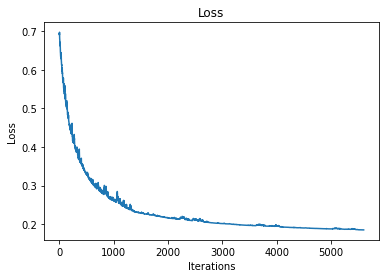

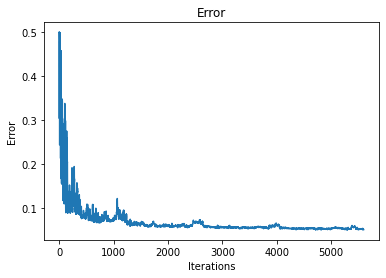

In [16]:
print("Weights: ")
print(w)
print("Train Error: {}".format(error(imgs_train, labels_train, w)))
plt.figure()
plt.plot(loss_hist)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()


plt.figure()
plt.plot(error_hist)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error')
plt.show()

# Part 5.5b

In [17]:
print("Train Error: {}".format(error(imgs_train, labels_train, w)))
print("Test Error: {}".format(error(imgs_test, labels_test, w)))

Train Error: 0.05071428571428571
Test Error: 0.057499999999999996
